## Introduction to Stats in Python Studio

We are going to be working with this [dataset](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data) from Kaggle.  No need to download, as it is included in the git repository you just cloned.
<br>

Heart Disease is the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide.
<br>

Heart failure is a common event caused by heart disease and this dataset contains 12 features that can be used to predict mortality by heart failure. You are tasked to look at two particular variables and record your observations about their usefulness for predicting the probability of heart failure.
<br>

In section one, you will be asked to run some simple EDA and apply statistical terminology to describe each variable in more detail.  Section two will explore what the distribution of your variables looks like. Finally, in section three you will be asked to make some inferences about your variables and if you feel they are good indicators of predicting heart failure.
<br>

Answer the questions and record your observations in the space provided. Feel free to add more code blocks if you'd like.
<br>



In [1]:
# Import libries need with alias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


# Set style and font size
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

In [2]:
# Read in data to a dataframe
df = pd.read_csv("heart3.csv")

## Section 1: First look at the data:

Run some simple EDA and look at the data and your variables. Answer the following questions.

In [3]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Which of our columns are catogorical data?<BR>anaemia, diabetes, high blood pressure,  sex, smoking<BR><BR>
Which of our columns are continuous?
<BR>age, ejection fraction, platelets, creatinine phosphokinase, time, serum sodium, serum creatine,  <BR><BR>

In [6]:
# high blood pressure and ejection fraction
df[['high_blood_pressure', 'ejection_fraction']].describe()

,high_blood_pressure,ejection_fraction
count,299.000000,299.000000
mean,0.351171,38.083612
std,0.478136,11.834841
min,0.000000,14.000000
25%,0.000000,30.000000
50%,0.000000,38.000000
75%,1.000000,45.000000
max,1.000000,80.000000


### Statistical interpretation of our data?
#### First Variable: high blood pressure
Mean, Min, Max, STD? Describe what this means.

<br>.35, 0, 1, .47<br><br>


#### Second Variable: ejection fraction
Mean, Min, Max, STD? Describe what this means.

<br>38. 14, 80, 11.8<br><br>

What could the numbers in our categorical data tell us?

<br><br><br>

Why might we want to keep our categorical data as 1's and 0's? Why may we want to use something like the code below to change it?



In [17]:
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
df['anaemia'] = df.anaemia.replace({1: "Yes", 0: "No"})
df['diabetes'] = df.diabetes.replace({1: "Yes", 0: "No"})
df['high_blood_pressure'] = df.high_blood_pressure.replace({1: "Yes", 0: "No"})
df['smoking'] = df.smoking.replace({1: "Yes", 0: "No"})

df['DEATH_EVENT'] = df.DEATH_EVENT.replace({1: "Dead", 0: "Alive"})

## Section 2: Distribution of our data:

array([[<AxesSubplot:title={'center':'ejection_fraction'}>]], dtype=object)

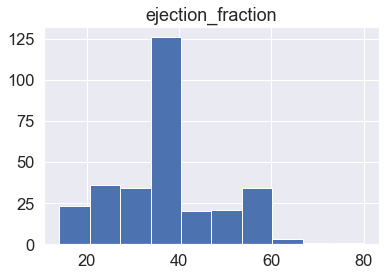

In [7]:
# Plot the distribution of your variable using distplot
df.hist(column='ejection_fraction')

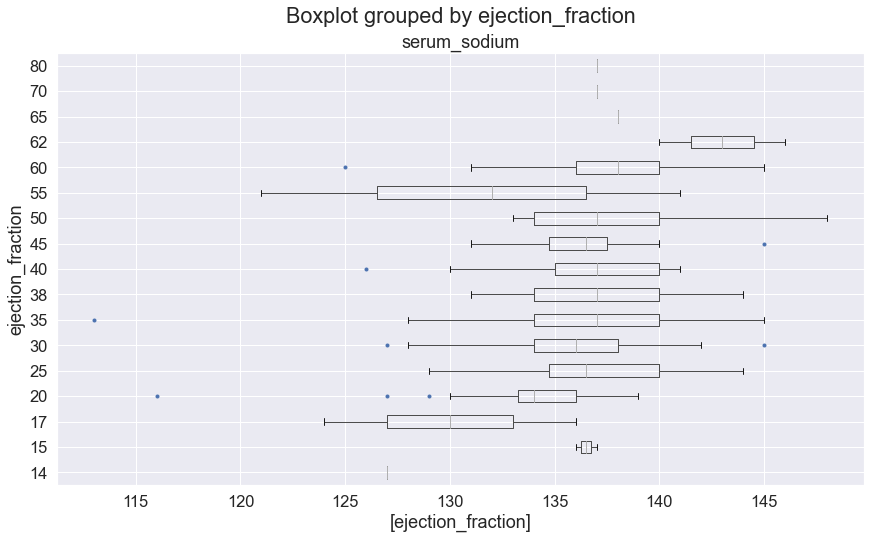

In [16]:
# Create boxplot to show distribution of variable
fig, ax = plt.subplots(figsize=(14,8))
ax.set_ylabel('ejection_fraction')
_ = df[['serum_sodium', 'ejection_fraction']].boxplot(by='ejection_fraction', figsize=(13,8), vert=False, sym='b.', ax=ax)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


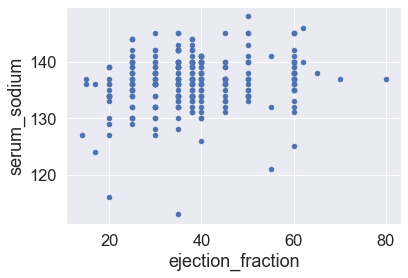

In [21]:
# Feel free to add any additional graphs that help you answer the questions below.
df.plot(
   x='ejection_fraction', 
   y='serum_sodium', 
   kind='scatter'
)

plt.show()

In [10]:
# Another way to check the skewness of our variable
df['ejection_fraction'].skew()

0.5553827516973211

In [11]:
# Another way to check the kurtosis of our variable
df['ejection_fraction'].kurtosis()

0.0414093598193892

### Interpretation of how our data is distributed by variable?
Looking at the above graphs, what can you tell about the distribution of your variables?
<br><br><br><br><br>
What is the skewness and kurtosis of your variables.  What does this mean?<br>
<br><br><br><br><br>
What are some of the differences you note looking at a categorical variable vs a continuous variable?
<br><br><br><br><br>

## Section 3: Finding Correlations

Lets start by breaking our data into two.  

In [18]:
# splitting the dataframe into 2 parts
# on basis of ‘DEATH_EVENT’ column values
df_died = df[df['DEATH_EVENT'] == 'Dead' ]
df_lived = df[df['DEATH_EVENT'] == '' ]

[]

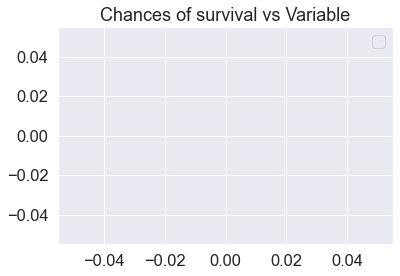

In [22]:
# Plot your variable based on if they died or lived

sns.histplot(df_died['ejection_fraction'])
sns.histplot(df_lived['ejection_fraction'])
plt.title("Chances of survival vs Variable")
plt.legend(('Died','Lived'))
plt.plot()


In [ ]:
# Feel free to add any additional graphs that help you answer the questions below.

#### What things can you infer if we consider our data a sample of the population, based on each of your variables.  
<br><br><br><br><br>
#### Do you think either of your variables is a good indicator for predicting Heart Failure, why or why not?  
<br><br><br><br><br>